In [136]:
!pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 8.4 MB/s eta 0:00:00


In [142]:
import cv2

In [97]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray

In [11]:
#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
#Tensorflow Addons
!pip install tensorflow-addons==0.21.0
import tensorflow_addons as tfa

In [13]:
#Tensorflow.......
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.12.0


In [15]:
# PIL - Python Image Library
import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

     -------------------------------------- 235.6/235.6 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [16]:
base_dir = "C:/Users/veera/Desktop/Alzheimer_s Dataset/"
#base_dir: The path to the base directory containing the Alzheimer's dataset is stored in this variable. 
root_dir = "./"
#root_dir: This variable denotes the location of the directory from which the code is being executed ("./").
test_dir = base_dir + "test/"
#test_dir: This variable stores the location of the base_dir's "test" subdirectory.
train_dir = base_dir + "train/"
#train_dir: This variable stores the location of the base_dir's "train" subdirectory.
work_dir = root_dir + "dataset/"
#work_dir: This variable designates the root_dir directory location where a new directory for working with the dataset will be created

if os.path.exists(work_dir):
    remove_tree(work_dir)
# If already Present , it will remove --> to Make the datasets fresh    

os.mkdir(work_dir)
#Copying the train_dir, and test_dir into work_dir
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))


Working Directory Contents: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [17]:
WORK_DIR = './dataset/'
# Cuurent Working Directory
classes = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']
# 4 Classes of disease --> level of severity
img_dim = 176
# target pic dimensions = 176(height) * 176(width)
image_dim = [176, 176]
dim = (img_dim, img_dim)
# Ultimately img size = 176*176

In [18]:
#Performing Image Augmentation as data is imbalanced so that we can have more data samples

zoom = [.99, 1.01]
bright_range = [0.8, 1.2]
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

#IDG-->IMAGE DATA GENERATOR(AUGUMENTATION)
work_dr = IDG(rescale = 1./255, brightness_range=bright_range, zoom_range=zoom, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=True)
train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=dim, batch_size=6500, shuffle=False)

#Sets up an ImageDataGenerator with specific augmentation settings and uses it to generate augmented image batches for training. 


Found 6400 images belonging to 4 classes.


In [22]:
train_data_gen.next()[0]

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [23]:
train_data, train_labels = train_data_gen.next()
"""next() on the generator, it generates and returns the next batch of data and labels 
based on the settings you provided earlier. 
The generator automatically advances its internal state to prepare the next batch"""
#####-------
"""train_data will contain a batch of 6500 augmented images, 
and train_labels will contain the corresponding labels for these images.
"""

In [24]:
print(train_data.shape, train_labels.shape)
"""batch of 6500 images, each with dimensions 176x176 pixels and 3 color channels (assuming RGB images), 
and the corresponding labels are one-hot encoded with 4 classes."""

(6400, 176, 176, 3) (6400, 4)


'batch of 6500 images, each with dimensions 176x176 pixels and 3 color channels (assuming RGB images), \nand the corresponding labels are one-hot encoded with 4 classes.'

In [25]:
# SMOTE --> Synthetic Minority Over-sampling Technique  --> For Imbalance
sm = SMOTE(random_state=42) # to reduce variety
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, img_dim * img_dim * 3), train_labels) # flattening the train_data
train_data = train_data.reshape(-1, img_dim, img_dim, 3)# getting back into original (176*176*3)
print(train_data.shape, train_labels.shape) # printing the size

## RESULT --> THE SIZE OF DATASET IS INCREASED

(12800, 176, 176, 3) (12800, 4)


In [26]:
#Splitting the data into train, test, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.25, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.25, random_state=42)

# MODEL

In [27]:
inception_model = InceptionV3(input_shape=(176, 176, 3), include_top=False, weights="imagenet")
# Pretrained Model.
# input shape = (176*176*3)--> The network can accept the image which has dimensions .
# include_top = False -----> The last classification layer of V3 is removed to add customizations to the network
# weights = imagenet --> Already pretrained weights are used , so training will finish fast.

87910968/87910968 [==============================] - 11s 0us/step


In [28]:
for layer in inception_model.layers:
    layer.trainable=False
# This effectively freezes the weights of all layers in the model, 
# preventing them from being updated during the training process.
# By keeping the pre-trained weights fixed, you can use the knowledge the model has gained from a larger dataset, 
# and you only update the weights of your custom layers during training.

In [39]:
# Total CNN = V3 + Inception_cnn_model(added newly)
my_inception_model = Sequential([
        inception_model,Dropout(0.5),GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),BatchNormalization(),
        Dropout(0.5),
        Dense(16, activation='relu'), 
        Dropout(0.5),
        Dense(4, activation='softmax')], name = "new_network")
# seuential -> one layer after another
# Dropout -> to reduce overfitting by dropping randomly 50% of nuerons
# GlobalAveragePooling2D -> Minimizing spatial dimension while retain features
# Flatten -> Convert to 1D array
# Dense = Fully connected layers
# relu -> activation Function

In [40]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.95:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
                 
my_callback = MyCallback()
#To stop if the accuracy reaches 95


#Adjustment of learning rate with validation Loss
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=3)

In [41]:
# List of Metrics to evaluate models performance
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
           tfa.metrics.F1Score(num_classes=4)]

# To Stop Training and adjusting the learning rate
CALLBACKS = [my_callback, rop_callback]
my_inception_model.compile(optimizer='rmsprop',loss=tf.losses.CategoricalCrossentropy(),metrics=METRICS)
# summary of model
my_inception_model.summary()

Model: "new_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 dropout_18 (Dropout)        (None, 4, 4, 2048)        0         
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_109 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dense_18 (Dense)            (None, 512)               

In [43]:
history = my_inception_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), callbacks=CALLBACKS, epochs=50)

Epoch 1/50
225/225 [==============================] - 223s 995ms/step - loss: 1.1962 - acc: 0.4444 - auc: 0.7328 - f1_score: 0.4262 - val_loss: 0.8709 - val_acc: 0.5904 - val_auc: 0.8545 - val_f1_score: 0.5513 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 220s 979ms/step - loss: 0.9852 - acc: 0.5292 - auc: 0.8145 - f1_score: 0.5086 - val_loss: 0.7654 - val_acc: 0.6237 - val_auc: 0.8820 - val_f1_score: 0.5831 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 219s 976ms/step - loss: 0.8859 - acc: 0.5860 - auc: 0.8535 - f1_score: 0.5568 - val_loss: 0.7206 - val_acc: 0.6454 - val_auc: 0.8975 - val_f1_score: 0.6106 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 218s 971ms/step - loss: 0.8185 - acc: 0.6228 - auc: 0.8771 - f1_score: 0.5975 - val_loss: 0.6890 - val_acc: 0.6604 - val_auc: 0.9069 - val_f1_score: 0.6317 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 218s 969ms/step - loss: 0.7960 - acc: 0.6424 - auc: 0.

In [57]:
history.history['acc']

[0.4444444477558136,
 0.5291666388511658,
 0.585972249507904,
 0.6227777600288391,
 0.6423611044883728,
 0.6527777910232544,
 0.6752777695655823,
 0.6775000095367432,
 0.6818055510520935,
 0.6881944537162781,
 0.6934722065925598,
 0.7030555605888367,
 0.7019444704055786,
 0.7122222185134888,
 0.7155555486679077,
 0.7273610830307007,
 0.7165277600288391,
 0.726805567741394,
 0.7352777719497681,
 0.7477777600288391,
 0.7479166388511658,
 0.7505555748939514,
 0.758472204208374,
 0.7611111402511597,
 0.7690277695655823,
 0.7656944394111633,
 0.7752777934074402,
 0.7699999809265137,
 0.7823610901832581,
 0.7869444489479065,
 0.7801389098167419,
 0.785277783870697,
 0.784583330154419,
 0.7958333492279053,
 0.7955555319786072,
 0.8009722232818604,
 0.7973611354827881,
 0.8013888597488403,
 0.8118055462837219,
 0.8151388764381409,
 0.8111110925674438,
 0.8251388669013977,
 0.8222222328186035,
 0.8111110925674438,
 0.8187500238418579,
 0.8173611164093018,
 0.8252778053283691,
 0.828611135482788

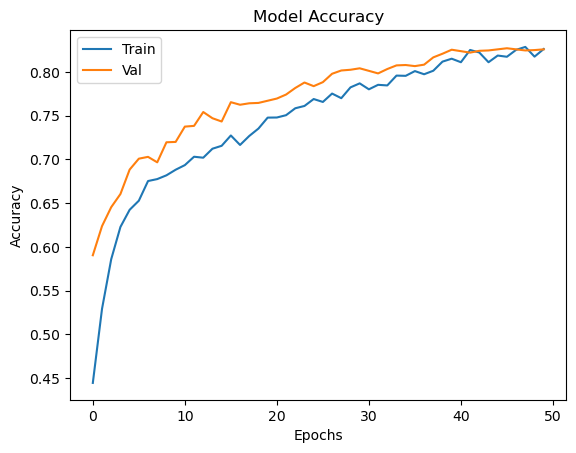

In [56]:
plt.plot(history.history['acc'])
plt.plot(history.history["val_" + 'acc'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'])
plt.show()

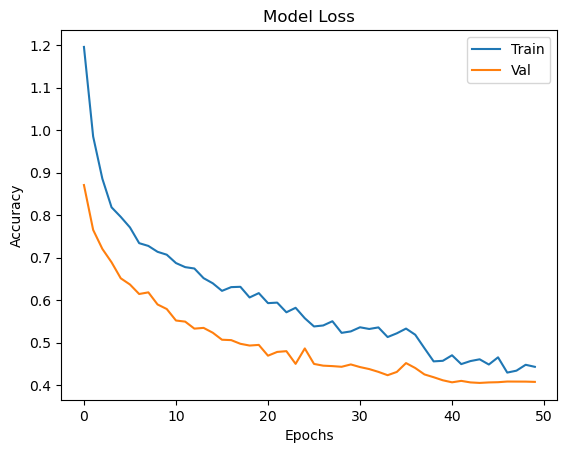

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_" + 'loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'])
plt.show()

In [61]:
test_final_scores = my_inception_model.evaluate(test_data, test_labels)
print("Testing Accuracy: %.3f%%"%(test_final_scores[1] * 100))

100/100 [==============================] - 76s 764ms/step - loss: 0.4191 - acc: 0.8197 - auc: 0.9687 - f1_score: 0.8182
Testing Accuracy: 81.969%


In [71]:
#Predicting for test data
predicting_labels = my_inception_model.predict(test_data)

100/100 [==============================] - 72s 724ms/step


In [72]:
predicting_labels
# We have to maximum value in each of the array for final prediction

array([[2.3356700e-02, 3.0590270e-06, 2.7823418e-01, 6.9840604e-01],
       [6.7920179e-16, 1.0000000e+00, 9.0800259e-16, 1.6311768e-11],
       [8.1885442e-02, 1.2818852e-04, 2.4014038e-01, 6.7784607e-01],
       ...,
       [9.9996984e-01, 1.0155019e-19, 6.3647096e-09, 3.0212270e-05],
       [4.3039140e-06, 7.9689165e-14, 7.3104501e-01, 2.6895067e-01],
       [6.4199266e-05, 4.2706703e-11, 6.2908572e-01, 3.7085012e-01]],
      dtype=float32)

In [73]:
# As we use softmax activation function in the last layer
# we have to change last arrya into [0,1,0,0]
def changearr(arr):
    max_prob_index = arr.argmax()  # Find the index of the maximum probability
    arr.fill(0)                     # Set all values to 0
    arr[max_prob_index] = 1         # Set the maximum probability value to 1
    return arr

In [74]:
for labels in predicting_labels:
    labels = changearr(labels)

In [75]:
predicting_labels

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [76]:
print(classification_report(test_labels, predicting_labels, target_names=classes))

                  precision    recall  f1-score   support

     NonDemented       0.89      0.94      0.92       793
VeryMildDemented       1.00      1.00      1.00       787
    MildDemented       0.82      0.54      0.66       828
ModerateDemented       0.62      0.80      0.70       792

       micro avg       0.82      0.82      0.82      3200
       macro avg       0.83      0.82      0.82      3200
    weighted avg       0.83      0.82      0.82      3200
     samples avg       0.82      0.82      0.82      3200



In [77]:
#Plot the confusion matrix to understand the classification in detail

#You are taking the prediction in each array and inserting into cm_pred_ls
cm_pred_ls = np.argmax(predicting_labels, axis=1)
cm_test_ls = np.argmax(test_labels, axis=1)
confusion_matrix_arr = confusion_matrix(cm_test_ls, cm_pred_ls)

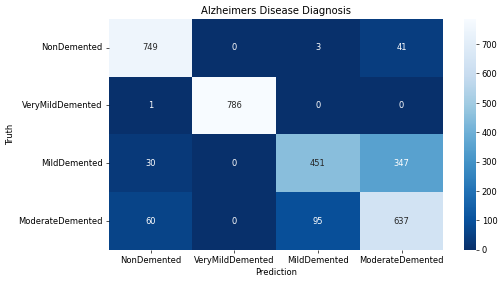

In [84]:
plt.figure(figsize=(9, 5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.heatmap(confusion_matrix_arr, cmap='Blues_r', annot=True, fmt='d', xticklabels= classes, yticklabels=classes)
plt.title('Alzheimers Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [86]:
print("Balanced Accuracy Score: {} %".format(round(BAS(cm_test_ls, cm_pred_ls) * 100, 3)))

Balanced Accuracy Score: 82.306 %


# Prediction

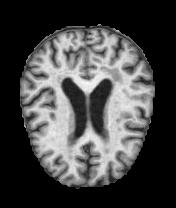

In [152]:
#Displaying The image
im = Image.open(r"C:/Users/veera/Desktop/Alzheimer_s Dataset/test/MildDemented/27 (4).jpg")
im

In [153]:
# Reading Image using Opencv and sending it to the network to make prediction
image_path = "C:/Users/veera/Desktop/Alzheimer_s Dataset/test/MildDemented/27 (4).jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
image = cv2.resize(image, (176, 176))  # Resize to the input size expected by the model
# Expand the dimensions to match the model's input shape
image = np.expand_dims(image, axis=0)
# Make predictions using the model
predictions = my_inception_model.predict(image)
# Interpret the predictions as needed (e.g., get the class label)

1/1 [==============================] - 0s 58ms/step


In [155]:
# Final Prediction
final_prediction = classes[np.argmax(predictions)]
print(final_prediction)

MildDemented
